In [64]:
import pandas as pd
data_er = pd.read_csv('currency_exchange_rates_02-01-1995_-_02-05-2018.csv')
print(data_er.head)

<bound method NDFrame.head of            Date  Algerian Dinar  Australian Dollar  Bahrain Dinar  \
0      1995-1-2             NaN                NaN            NaN   
1      1995-1-3             NaN                NaN          0.376   
2      1995-1-4             NaN             0.7704          0.376   
3      1995-1-5             NaN             0.7693          0.376   
4      1995-1-6             NaN             0.7699          0.376   
...         ...             ...                ...            ...   
5973  2018-4-26        114.8506             0.7574          0.376   
5974  2018-4-27        115.0604             0.7545          0.376   
5975  2018-4-30        114.8873             0.7570          0.376   
5976   2018-5-1             NaN             0.7540          0.376   
5977   2018-5-2             NaN                NaN          0.376   

      Bolivar Fuerte  Botswana Pula  Brazilian Real  Brunei Dollar  \
0                NaN            NaN             NaN            NaN   
1

In [65]:
# Convert the 'date_column' to datetime if it's not already in datetime format
data_er['Date'] = pd.to_datetime(data_er['Date'])

# Filter rows based on the date range
start_date = '2013-01-01'
end_date = '2018-02-05'

filtered_data_er = data_er[(data_er['Date'] >= start_date) & (data_er['Date'] <= end_date)]
print(filtered_data_er.head)
print(filtered_data_er.shape)

<bound method NDFrame.head of            Date  Algerian Dinar  Australian Dollar  Bahrain Dinar  \
4644 2013-01-02         77.9570             1.0468          0.376   
4645 2013-01-03         78.3002                NaN          0.376   
4646 2013-01-04         78.4905             1.0434          0.376   
4647 2013-01-07         78.3786             1.0472          0.376   
4648 2013-01-08         78.3264             1.0480          0.376   
...         ...             ...                ...            ...   
5912 2018-01-30        113.4645             0.8070          0.376   
5913 2018-01-31        113.4278             0.8073          0.376   
5914 2018-02-01        113.4225             0.8044          0.376   
5915 2018-02-02        113.3911             0.7997          0.376   
5916 2018-02-05        113.5692             0.7929          0.376   

      Bolivar Fuerte  Botswana Pula  Brazilian Real  Brunei Dollar  \
4644          4.2893         0.1287             NaN         1.2208   
4

In [66]:
#drop Date
data_er_cleaned1 = filtered_data_er.drop(data_er.columns[0], axis=1)
print(data_er_cleaned1.head())

      Algerian Dinar  Australian Dollar  Bahrain Dinar  Bolivar Fuerte  \
4644         77.9570             1.0468          0.376          4.2893   
4645         78.3002                NaN          0.376          4.2893   
4646         78.4905             1.0434          0.376          4.2893   
4647         78.3786             1.0472          0.376             NaN   
4648         78.3264             1.0480          0.376          4.2893   

      Botswana Pula  Brazilian Real  Brunei Dollar  Canadian Dollar  \
4644         0.1287             NaN         1.2208           0.9859   
4645         0.1275          2.0415         1.2227           0.9853   
4646         0.1267          2.0464         1.2296           0.9856   
4647         0.1271          2.0425         1.2307           0.9860   
4648         0.1276          2.0312         1.2289           0.9873   

      Chilean Peso  Chinese Yuan  ...  South African Rand  Sri Lanka Rupee  \
4644        479.96           NaN  ...             

In [116]:
#count missing values
nd_counts = data_er_cleaned1.isna().sum()
print(nd_counts)

print(data_er_cleaned1.isna().sum().sum())

#1273 in total
#drop columns with >100 misssing values 
# Indian Rupee
# Iranian Rial
# Kuwaiti Dinar
# Nuevo Sol 
# Sri Lanka Rupee
# Tunisian Dinar 

Algerian Dinar                 37
Australian Dollar              50
Bahrain Dinar                  16
Bolivar Fuerte                 88
Botswana Pula                  64
Brazilian Real                 20
Brunei Dollar                  76
Canadian Dollar                54
Chilean Peso                   61
Chinese Yuan                   87
Colombian Peso                 78
Czech Koruna                   47
Danish Krone                   54
Euro                           16
Hungarian Forint               51
Icelandic Krona                57
Indian Rupee                  113
Indonesian Rupiah              81
Iranian Rial                  332
Israeli New Sheqel             88
Japanese Yen                   68
Kazakhstani Tenge              55
Korean Won                     70
Kuwaiti Dinar                 102
Libyan Dinar                   15
Malaysian Ringgit              81
Mauritian Rupee                91
Mexican Peso                   84
Nepalese Rupee                 29
New Zealand Do

In [81]:
columns_to_drop = ['Iranian Rial', 'Bahrain Dinar', 'U.A.E. Dirham', 'Libyan Dinar', 'Qatar Riyal', 'Rial Omani', 'Saudi Arabian Riyal', 'U.S. Dollar']

#drop the specified columns
data_er_cleaned2 = data_er_cleaned1.drop(columns=columns_to_drop, errors='ignore')
print(data_er_cleaned2.shape)

#if we drop all nas-only 370 obserevations left; no do not want do this
# data_er_cleaned1 = data_er_cleaned.dropna()
# print(data_er_cleaned1.shape)

(1273, 43)


In [99]:
def impute_missing_values(df):
    for column in data_er_cleaned2.columns:
        #use linear interpolation to fill in the missing values
        df[column] = df[column].interpolate(method='linear', limit_direction='both')
    return data_er_cleaned

data_er_cleaned3 = impute_missing_values(data_er_cleaned2)
data_er_cleaned3 = data_er_cleaned3.iloc[:, :-1]

print(data_er_cleaned3.shape)
print(data_er_cleaned3.isna().sum())

(1273, 43)
Algerian Dinar                0
Australian Dollar             0
Bolivar Fuerte                0
Botswana Pula                 0
Brazilian Real                0
Brunei Dollar                 0
Canadian Dollar               0
Chilean Peso                  0
Chinese Yuan                  0
Colombian Peso                0
Czech Koruna                  0
Danish Krone                  0
Euro                          0
Hungarian Forint              0
Icelandic Krona               0
Indian Rupee                  0
Indonesian Rupiah             0
Israeli New Sheqel            0
Japanese Yen                  0
Kazakhstani Tenge             0
Korean Won                    0
Kuwaiti Dinar                 0
Malaysian Ringgit             0
Mauritian Rupee               0
Mexican Peso                  0
Nepalese Rupee                0
New Zealand Dollar            0
Norwegian Krone               0
Nuevo Sol                     0
Pakistani Rupee               0
Peso Uruguayo                

In [100]:
data_er_cleaned = data_er_cleaned3

In [101]:
from sklearn.preprocessing import StandardScaler

index = data_er_cleaned.index
columns = data_er_cleaned.columns

scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df_er_cleaned_scaled = scaler.fit_transform(data_er_cleaned)
df_er_cleaned_scaled = pd.DataFrame(df_er_cleaned_scaled, index=index, columns=columns)


print(df_er_cleaned_scaled.head())
df_er_cleaned_scaled = df_er_cleaned_scaled.apply(pd.to_numeric, errors='coerce')

      Algerian Dinar  Australian Dollar  Bolivar Fuerte  Botswana Pula  \
4644       -1.312300           2.261959       -0.069164       2.389113   
4645       -1.288034           2.261959       -0.069164       2.274782   
4646       -1.274580           2.227035       -0.069164       2.198562   
4647       -1.282491           2.266068       -0.069164       2.236672   
4648       -1.286182           2.274285       -0.069164       2.284310   

      Brazilian Real  Brunei Dollar  Canadian Dollar  Chilean Peso  \
4644       -1.467202      -1.721774        -1.817085     -1.822587   
4645       -1.467202      -1.691982        -1.821992     -1.888318   
4646       -1.458923      -1.583789        -1.819539     -1.917438   
4647       -1.465513      -1.566541        -1.816267     -1.919134   
4648       -1.484606      -1.594765        -1.805634     -1.942600   

      Chinese Yuan  Colombian Peso  ...  Russian Ruble  Singapore Dollar  \
4644     -0.381419       -1.493162  ...      -1.472468    

In [102]:
#reshape data
df_er_transposed = df_er_cleaned_scaled.transpose()
print(df_er_transposed)

                                4644      4645      4646      4647      4648  \
Algerian Dinar             -1.312300 -1.288034 -1.274580 -1.282491 -1.286182   
Australian Dollar           2.261959  2.261959  2.227035  2.266068  2.274285   
Bolivar Fuerte             -0.069164 -0.069164 -0.069164 -0.069164 -0.069164   
Botswana Pula               2.389113  2.274782  2.198562  2.236672  2.284310   
Brazilian Real             -1.467202 -1.467202 -1.458923 -1.465513 -1.484606   
Brunei Dollar              -1.721774 -1.691982 -1.583789 -1.566541 -1.594765   
Canadian Dollar            -1.817085 -1.821992 -1.819539 -1.816267 -1.805634   
Chilean Peso               -1.822587 -1.888318 -1.917438 -1.919134 -1.942600   
Chinese Yuan               -0.381419 -0.381419 -0.381419 -0.390579 -0.415493   
Colombian Peso             -1.493162 -1.493162 -1.491494 -1.491494 -1.478480   
Czech Koruna               -1.582038 -1.466044 -1.370440 -1.331020 -1.345519   
Danish Krone               -1.129541 -1.

In [103]:
correlation_matrix = df_er_cleaned_scaled.corr()
styled_matrix = correlation_matrix.style.set_table_styles([{'selector': 'th',
                                                           'props': [('font-size', '8pt')]}])
styled_matrix

,Algerian Dinar,Australian Dollar,Bolivar Fuerte,Botswana Pula,Brazilian Real,Brunei Dollar,Canadian Dollar,Chilean Peso,Chinese Yuan,Colombian Peso,Czech Koruna,Danish Krone,Euro,Hungarian Forint,Icelandic Krona,Indian Rupee,Indonesian Rupiah,Israeli New Sheqel,Japanese Yen,Kazakhstani Tenge,Korean Won,Kuwaiti Dinar,Malaysian Ringgit,Mauritian Rupee,Mexican Peso,Nepalese Rupee,New Zealand Dollar,Norwegian Krone,Nuevo Sol,Pakistani Rupee,Peso Uruguayo,Philippine Peso,Polish Zloty,Russian Ruble,Singapore Dollar,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.K. Pound Sterling
Algerian Dinar,1.000000,-0.884266,0.067068,-0.916970,0.891425,0.885512,0.917884,0.861523,0.797813,0.962358,0.769217,0.857695,-0.871533,0.874246,-0.216656,0.802483,0.850921,0.359101,0.574990,0.924334,0.661354,0.957572,0.950304,0.887425,0.956463,0.804769,-0.886031,0.947498,0.944160,0.643969,0.931177,0.864635,0.873511,0.889466,0.885257,0.887310,0.915932,0.913852,0.786597,0.762682,0.718804,0.926394,-0.833456
Australian Dollar,-0.884266,1.000000,-0.020016,0.963233,-0.941821,-0.936896,-0.957279,-0.958215,-0.582032,-0.929961,-0.879598,-0.881339,0.884210,-0.912147,-0.026798,-0.898637,-0.944450,-0.530288,-0.784650,-0.775273,-0.668655,-0.918375,-0.898868,-0.897909,-0.839949,-0.899164,0.917753,-0.960152,-0.955828,-0.597481,-0.928335,-0.757676,-0.883081,-0.934094,-0.936828,-0.911921,-0.733847,-0.920438,-0.711037,-0.902541,-0.434185,-0.763177,0.612867
Bolivar Fuerte,0.067068,-0.020016,1.000000,-0.003943,0.027714,-0.006633,0.018921,0.000823,-0.008640,0.035330,-0.045331,-0.018829,0.013847,-0.011750,-0.104891,0.016119,0.042609,-0.077455,0.003755,0.055354,-0.036339,0.031916,0.021365,-0.015968,0.055040,0.016140,-0.017377,0.020285,0.033832,0.125163,0.038803,0.098013,-0.023576,0.022465,-0.006672,-0.000210,0.088013,0.011934,-0.023946,-0.045187,0.075700,0.080813,-0.029943
Botswana Pula,-0.916970,0.963233,-0.003943,1.000000,-0.946650,-0.923310,-0.967290,-0.968276,-0.678451,-0.959159,-0.870304,-0.878364,0.883010,-0.918056,0.034524,-0.902181,-0.917976,-0.509439,-0.687665,-0.876145,-0.694594,-0.919694,-0.918490,-0.907289,-0.886959,-0.903136,0.893961,-0.966141,-0.982025,-0.576680,-0.971325,-0.778955,-0.906750,-0.949993,-0.923314,-0.979937,-0.788124,-0.914244,-0.753046,-0.912526,-0.527471,-0.789582,0.676642
Brazilian Real,0.891425,-0.941821,0.027714,-0.946650,1.000000,0.916385,0.939940,0.937984,0.587029,0.957525,0.821424,0.855590,-0.859157,0.880943,0.082533,0.842007,0.893972,0.547819,0.717866,0.821501,0.752121,0.898067,0.895299,0.909718,0.817594,0.843290,-0.938239,0.940362,0.942863,0.578946,0.941693,0.700303,0.865498,0.942028,0.916541,0.938720,0.722884,0.865329,0.730426,0.886206,0.401278,0.710082,-0.581716
Brunei Dollar,0.885512,-0.936896,-0.006633,-0.923310,0.916385,1.000000,0.959096,0.913041,0.710495,0.932338,0.907070,0.940711,-0.937485,0.947263,0.017506,0.820318,0.861871,0.578249,0.745533,0.787697,0.781422,0.938810,0.949483,0.930387,0.873459,0.821027,-0.913186,0.956254,0.924878,0.507601,0.866555,0.753640,0.947411,0.913572,0.999826,0.871734,0.749850,0.945870,0.819946,0.872937,0.483654,0.770370,-0.720910
Canadian Dollar,0.917884,-0.957279,0.018921,-0.967290,0.939940,0.959096,1.000000,0.962332,0.712247,0.962864,0.897469,0.916557,-0.916906,0.944789,-0.043084,0.845102,0.907498,0.514491,0.709275,0.853401,0.694508,0.939271,0.942089,0.926941,0.895237,0.847770,-0.903865,0.980750,0.966675,0.539569,0.931562,0.779269,0.923748,0.949679,0.959260,0.929565,0.788023,0.949202,0.761858,0.893203,0.523772,0.802749,-0.705819
Chilean Peso,0.861523,-0.958215,0.000823,-0.968276,0.937984,0.913041,0.962332,1.000000,0.609479,0.929631,0.874905,0.855226,-0.858459,0.906268,0.007103,0.864282,0.932650,0.525660,0.744017,0.812847,0.639106,0.885830,0.890894,0.876085,0.823312,0.866889,-0.874298,0.945969,0.949254,0.506902,0.946106,0.732679,0.869293,0.944119,0.913062,0.936766,0.717899,0.898883,0.693524,0.928916,0.417089,0.733649,-0.572970
Chinese Yuan,0

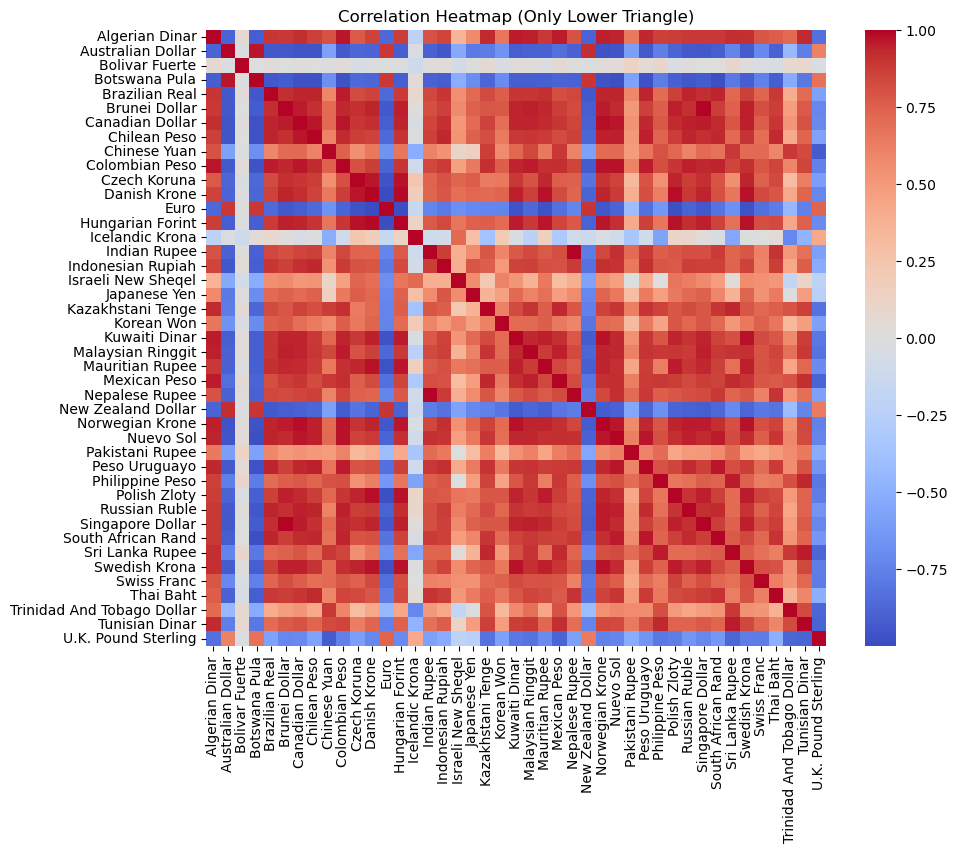

In [135]:
import matplotlib.pyplot as plt

import seaborn as sns

# Create a heatmap using seaborn with the upper triangle masked
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap (Only Lower Triangle)")
plt.show()

In [131]:
most_correlated_pairs = {}

for currency in correlation_matrix.columns:
    
    #exclude the current currency from the correlation matrix
    other_currencies = correlation_matrix.columns[correlation_matrix.columns != currency]
    
    #find the top correlated currencies
    top_correlated = correlation_matrix[other_currencies].loc[currency].nlargest(2)
    
    # Store the results in a dictionary
    most_correlated_pairs[currency] = {
        'Top 1 Correlated': top_correlated.index[0],
        'Correlation Value 1': top_correlated.iloc[0],
        'Top 2 Correlated': top_correlated.index[1],
        'Correlation Value 2': top_correlated.iloc[1]
    }

# Print the results
for currency, correlations in most_correlated_pairs.items():
    print(f"For {currency}:")
    print(f"   {correlations['Top 1 Correlated']} with correlation {correlations['Correlation Value 1']}")
    print(f"   {correlations['Top 2 Correlated']} with correlation {correlations['Correlation Value 2']}")
    print()

For Algerian Dinar:
   Colombian Peso with correlation 0.9623584823499817
   Kuwaiti Dinar with correlation 0.95757207473424

For Australian Dollar:
   Botswana Pula with correlation 0.9632326386174503
   New Zealand Dollar with correlation 0.9177533483580966

For Bolivar Fuerte:
   Pakistani Rupee with correlation 0.12516256530619316
   Philippine Peso with correlation 0.0980125684930258

For Botswana Pula:
   Australian Dollar with correlation 0.9632326386174503
   New Zealand Dollar with correlation 0.8939614286309039

For Brazilian Real:
   Colombian Peso with correlation 0.9575253283578501
   Nuevo Sol with correlation 0.9428633042232378

For Brunei Dollar:
   Singapore Dollar with correlation 0.9998260327677573
   Canadian Dollar with correlation 0.959096484372116

For Canadian Dollar:
   Norwegian Krone with correlation 0.9807501464777817
   Nuevo Sol with correlation 0.9666751225886576

For Chilean Peso:
   Canadian Dollar with correlation 0.9623319955051117
   Nuevo Sol with c

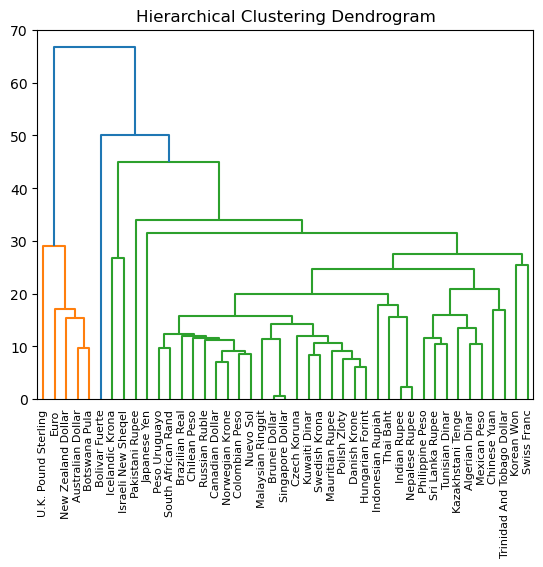

In [147]:
#Hierachical clustering 
#Plot denogram
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(df_er_transposed, method='average')
dendrogram(linkage_matrix, labels=df_er_transposed.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [133]:
row_to_exclude = []
df_er_transposed_filtered = df_er_transposed[~df_er_transposed.index.isin(row_to_exclude)]

print(df_er_transposed.shape)
print(df_er_transposed_filtered.shape)

(43, 1273)
(43, 1273)


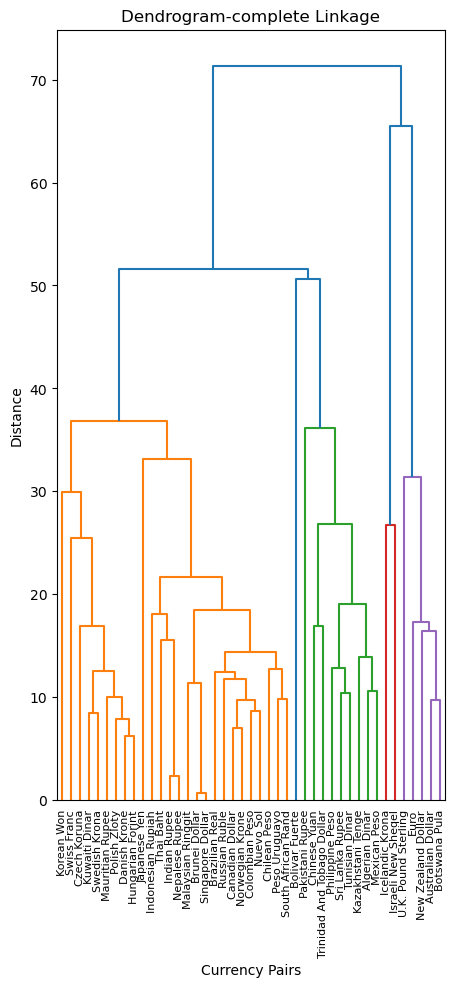

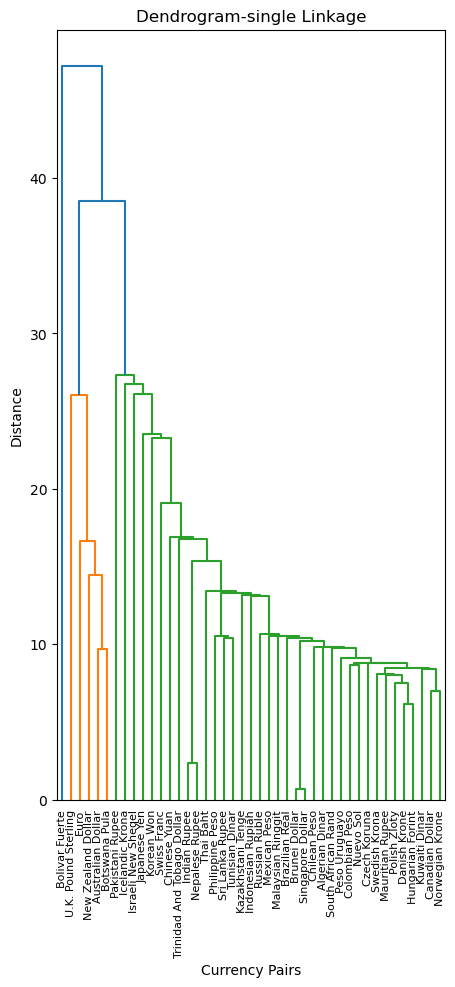

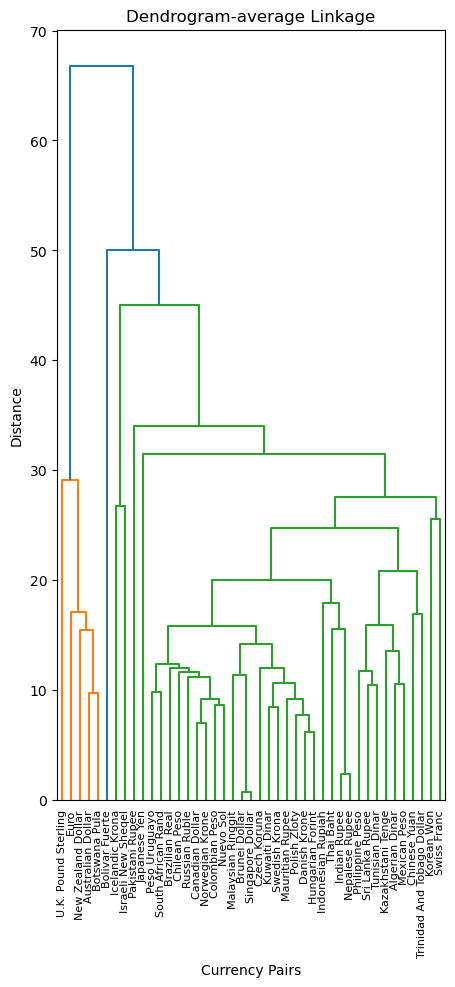

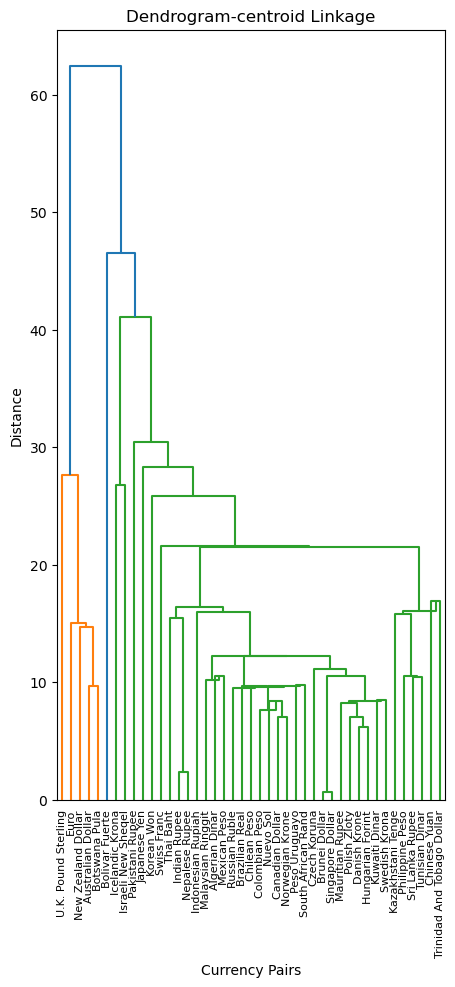

In [134]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#Heirachical clustering 
methods = ['complete', 'single', 'average', 'centroid']

for method in methods:
    linkage_matrix = linkage(df_er_transposed_filtered, method)
    
    plt.figure(figsize=(5, 10))
    dendrogram(linkage_matrix, labels=df_er_transposed_filtered.index, leaf_rotation=90, leaf_font_size=8, show_leaf_counts=True)
    
    plt.title(f"Dendrogram-{method} Linkage")
    plt.xlabel("Currency Pairs")
    plt.ylabel("Distance")
    plt.show()

In [109]:
#K means clustering
#print(df_er_transposed_filtered.head())
#print(type(df_er_transposed_filtered))
labels = df_er_transposed_filtered.index.tolist()
print(labels)
X = df_er_transposed_filtered.reset_index(drop=True)
print(X.head())

['Algerian Dinar', 'Australian Dollar', 'Bolivar Fuerte', 'Botswana Pula', 'Brazilian Real', 'Brunei Dollar', 'Canadian Dollar', 'Chilean Peso', 'Chinese Yuan', 'Colombian Peso', 'Czech Koruna', 'Danish Krone', 'Euro', 'Hungarian Forint', 'Icelandic Krona', 'Indian Rupee', 'Indonesian Rupiah', 'Israeli New Sheqel', 'Japanese Yen', 'Kazakhstani Tenge', 'Korean Won', 'Kuwaiti Dinar', 'Malaysian Ringgit', 'Mauritian Rupee', 'Mexican Peso', 'Nepalese Rupee', 'New Zealand Dollar', 'Norwegian Krone', 'Nuevo Sol', 'Pakistani Rupee', 'Peso Uruguayo', 'Philippine Peso', 'Polish Zloty', 'Russian Ruble', 'Singapore Dollar', 'South African Rand', 'Sri Lanka Rupee', 'Swedish Krona', 'Swiss Franc', 'Thai Baht', 'Trinidad And Tobago Dollar', 'Tunisian Dinar', 'U.K. Pound Sterling']
       4644      4645      4646      4647      4648      4649      4650  \
0 -1.312300 -1.288034 -1.274580 -1.282491 -1.286182 -1.286182 -1.289873   
1  2.261959  2.261959  2.227035  2.266068  2.274285  2.298938  2.345161 

/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

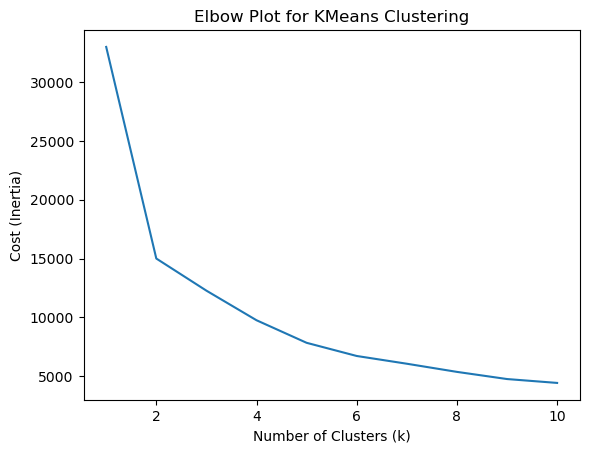

In [110]:
from sklearn.cluster import KMeans

#K means clustering
costs = []
k_values = [1,2,3,4,5,6,7,8,9,10]
for k in k_values:
    clustering = KMeans(n_clusters=k)
    
    # Fit the model and calculate the cost
    clustering.fit(X)
    costs.append(clustering.inertia_)

plt.plot(k_values, costs)
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.show()

In [111]:
import numpy as np

optimal_k = 4
np.random.seed(1) 
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)
cluster_assignments = kmeans.labels_
print(cluster_assignments)
print(labels)

[0 1 3 1 0 0 0 0 3 0 0 0 1 0 2 0 0 2 0 3 0 0 0 0 3 0 1 0 0 3 0 3 0 0 0 0 3
 0 0 0 3 3 1]
['Algerian Dinar', 'Australian Dollar', 'Bolivar Fuerte', 'Botswana Pula', 'Brazilian Real', 'Brunei Dollar', 'Canadian Dollar', 'Chilean Peso', 'Chinese Yuan', 'Colombian Peso', 'Czech Koruna', 'Danish Krone', 'Euro', 'Hungarian Forint', 'Icelandic Krona', 'Indian Rupee', 'Indonesian Rupiah', 'Israeli New Sheqel', 'Japanese Yen', 'Kazakhstani Tenge', 'Korean Won', 'Kuwaiti Dinar', 'Malaysian Ringgit', 'Mauritian Rupee', 'Mexican Peso', 'Nepalese Rupee', 'New Zealand Dollar', 'Norwegian Krone', 'Nuevo Sol', 'Pakistani Rupee', 'Peso Uruguayo', 'Philippine Peso', 'Polish Zloty', 'Russian Ruble', 'Singapore Dollar', 'South African Rand', 'Sri Lanka Rupee', 'Swedish Krona', 'Swiss Franc', 'Thai Baht', 'Trinidad And Tobago Dollar', 'Tunisian Dinar', 'U.K. Pound Sterling']


/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [112]:
cluster_dict = {}

for currency, cluster in zip(labels, cluster_assignments):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = [currency]
    else:
        cluster_dict[cluster].append(currency)

for cluster, currencies in cluster_dict.items():
    print(f"Cluster {cluster}: {', '.join(currencies)}")

Cluster 0: Algerian Dinar, Brazilian Real, Brunei Dollar, Canadian Dollar, Chilean Peso, Colombian Peso, Czech Koruna, Danish Krone, Hungarian Forint, Indian Rupee, Indonesian Rupiah, Japanese Yen, Korean Won, Kuwaiti Dinar, Malaysian Ringgit, Mauritian Rupee, Nepalese Rupee, Norwegian Krone, Nuevo Sol, Peso Uruguayo, Polish Zloty, Russian Ruble, Singapore Dollar, South African Rand, Swedish Krona, Swiss Franc, Thai Baht
Cluster 1: Australian Dollar, Botswana Pula, Euro, New Zealand Dollar, U.K. Pound Sterling
Cluster 3: Bolivar Fuerte, Chinese Yuan, Kazakhstani Tenge, Mexican Peso, Pakistani Rupee, Philippine Peso, Sri Lanka Rupee, Trinidad And Tobago Dollar, Tunisian Dinar
Cluster 2: Icelandic Krona, Israeli New Sheqel


In [148]:
optimal_k = 10
np.random.seed(1) 
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)
cluster_assignments = kmeans.labels_
print(cluster_assignments)
print(labels)

[6 1 4 1 0 2 0 0 3 0 2 2 1 2 5 0 0 5 2 6 9 2 6 2 6 0 1 2 0 7 0 6 2 0 2 0 6
 2 9 0 3 6 8]
['Algerian Dinar', 'Australian Dollar', 'Bolivar Fuerte', 'Botswana Pula', 'Brazilian Real', 'Brunei Dollar', 'Canadian Dollar', 'Chilean Peso', 'Chinese Yuan', 'Colombian Peso', 'Czech Koruna', 'Danish Krone', 'Euro', 'Hungarian Forint', 'Icelandic Krona', 'Indian Rupee', 'Indonesian Rupiah', 'Israeli New Sheqel', 'Japanese Yen', 'Kazakhstani Tenge', 'Korean Won', 'Kuwaiti Dinar', 'Malaysian Ringgit', 'Mauritian Rupee', 'Mexican Peso', 'Nepalese Rupee', 'New Zealand Dollar', 'Norwegian Krone', 'Nuevo Sol', 'Pakistani Rupee', 'Peso Uruguayo', 'Philippine Peso', 'Polish Zloty', 'Russian Ruble', 'Singapore Dollar', 'South African Rand', 'Sri Lanka Rupee', 'Swedish Krona', 'Swiss Franc', 'Thai Baht', 'Trinidad And Tobago Dollar', 'Tunisian Dinar', 'U.K. Pound Sterling']


/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [149]:
cluster_dict = {}

for currency, cluster in zip(labels, cluster_assignments):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = [currency]
    else:
        cluster_dict[cluster].append(currency)

for cluster, currencies in cluster_dict.items():
    print(f"Cluster {cluster}: {', '.join(currencies)}")

Cluster 6: Algerian Dinar, Kazakhstani Tenge, Malaysian Ringgit, Mexican Peso, Philippine Peso, Sri Lanka Rupee, Tunisian Dinar
Cluster 1: Australian Dollar, Botswana Pula, Euro, New Zealand Dollar
Cluster 4: Bolivar Fuerte
Cluster 0: Brazilian Real, Canadian Dollar, Chilean Peso, Colombian Peso, Indian Rupee, Indonesian Rupiah, Nepalese Rupee, Nuevo Sol, Peso Uruguayo, Russian Ruble, South African Rand, Thai Baht
Cluster 2: Brunei Dollar, Czech Koruna, Danish Krone, Hungarian Forint, Japanese Yen, Kuwaiti Dinar, Mauritian Rupee, Norwegian Krone, Polish Zloty, Singapore Dollar, Swedish Krona
Cluster 3: Chinese Yuan, Trinidad And Tobago Dollar
Cluster 5: Icelandic Krona, Israeli New Sheqel
Cluster 9: Korean Won, Swiss Franc
Cluster 7: Pakistani Rupee
Cluster 8: U.K. Pound Sterling
